# House Prices: Advanced Regression Techniques

By Emily Strong 

This data is from the House Prices: Advanced Regression Techniques Kaggle competition:
https://www.kaggle.com/c/house-prices-advanced-regression-techniques. The data dictionary is in the file 'data_description.txt'.


# Part A

In [237]:
# Dependencies
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pyplot import cm

# Set formatting for matplotlib
plt.style.use('fivethirtyeight')

# Set max columns
pd.set_option('display.max_columns', 100)


## Import Data

In [175]:
data = pd.read_csv('train.csv', header=0)

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

# Data Cleansing
## Missing Values

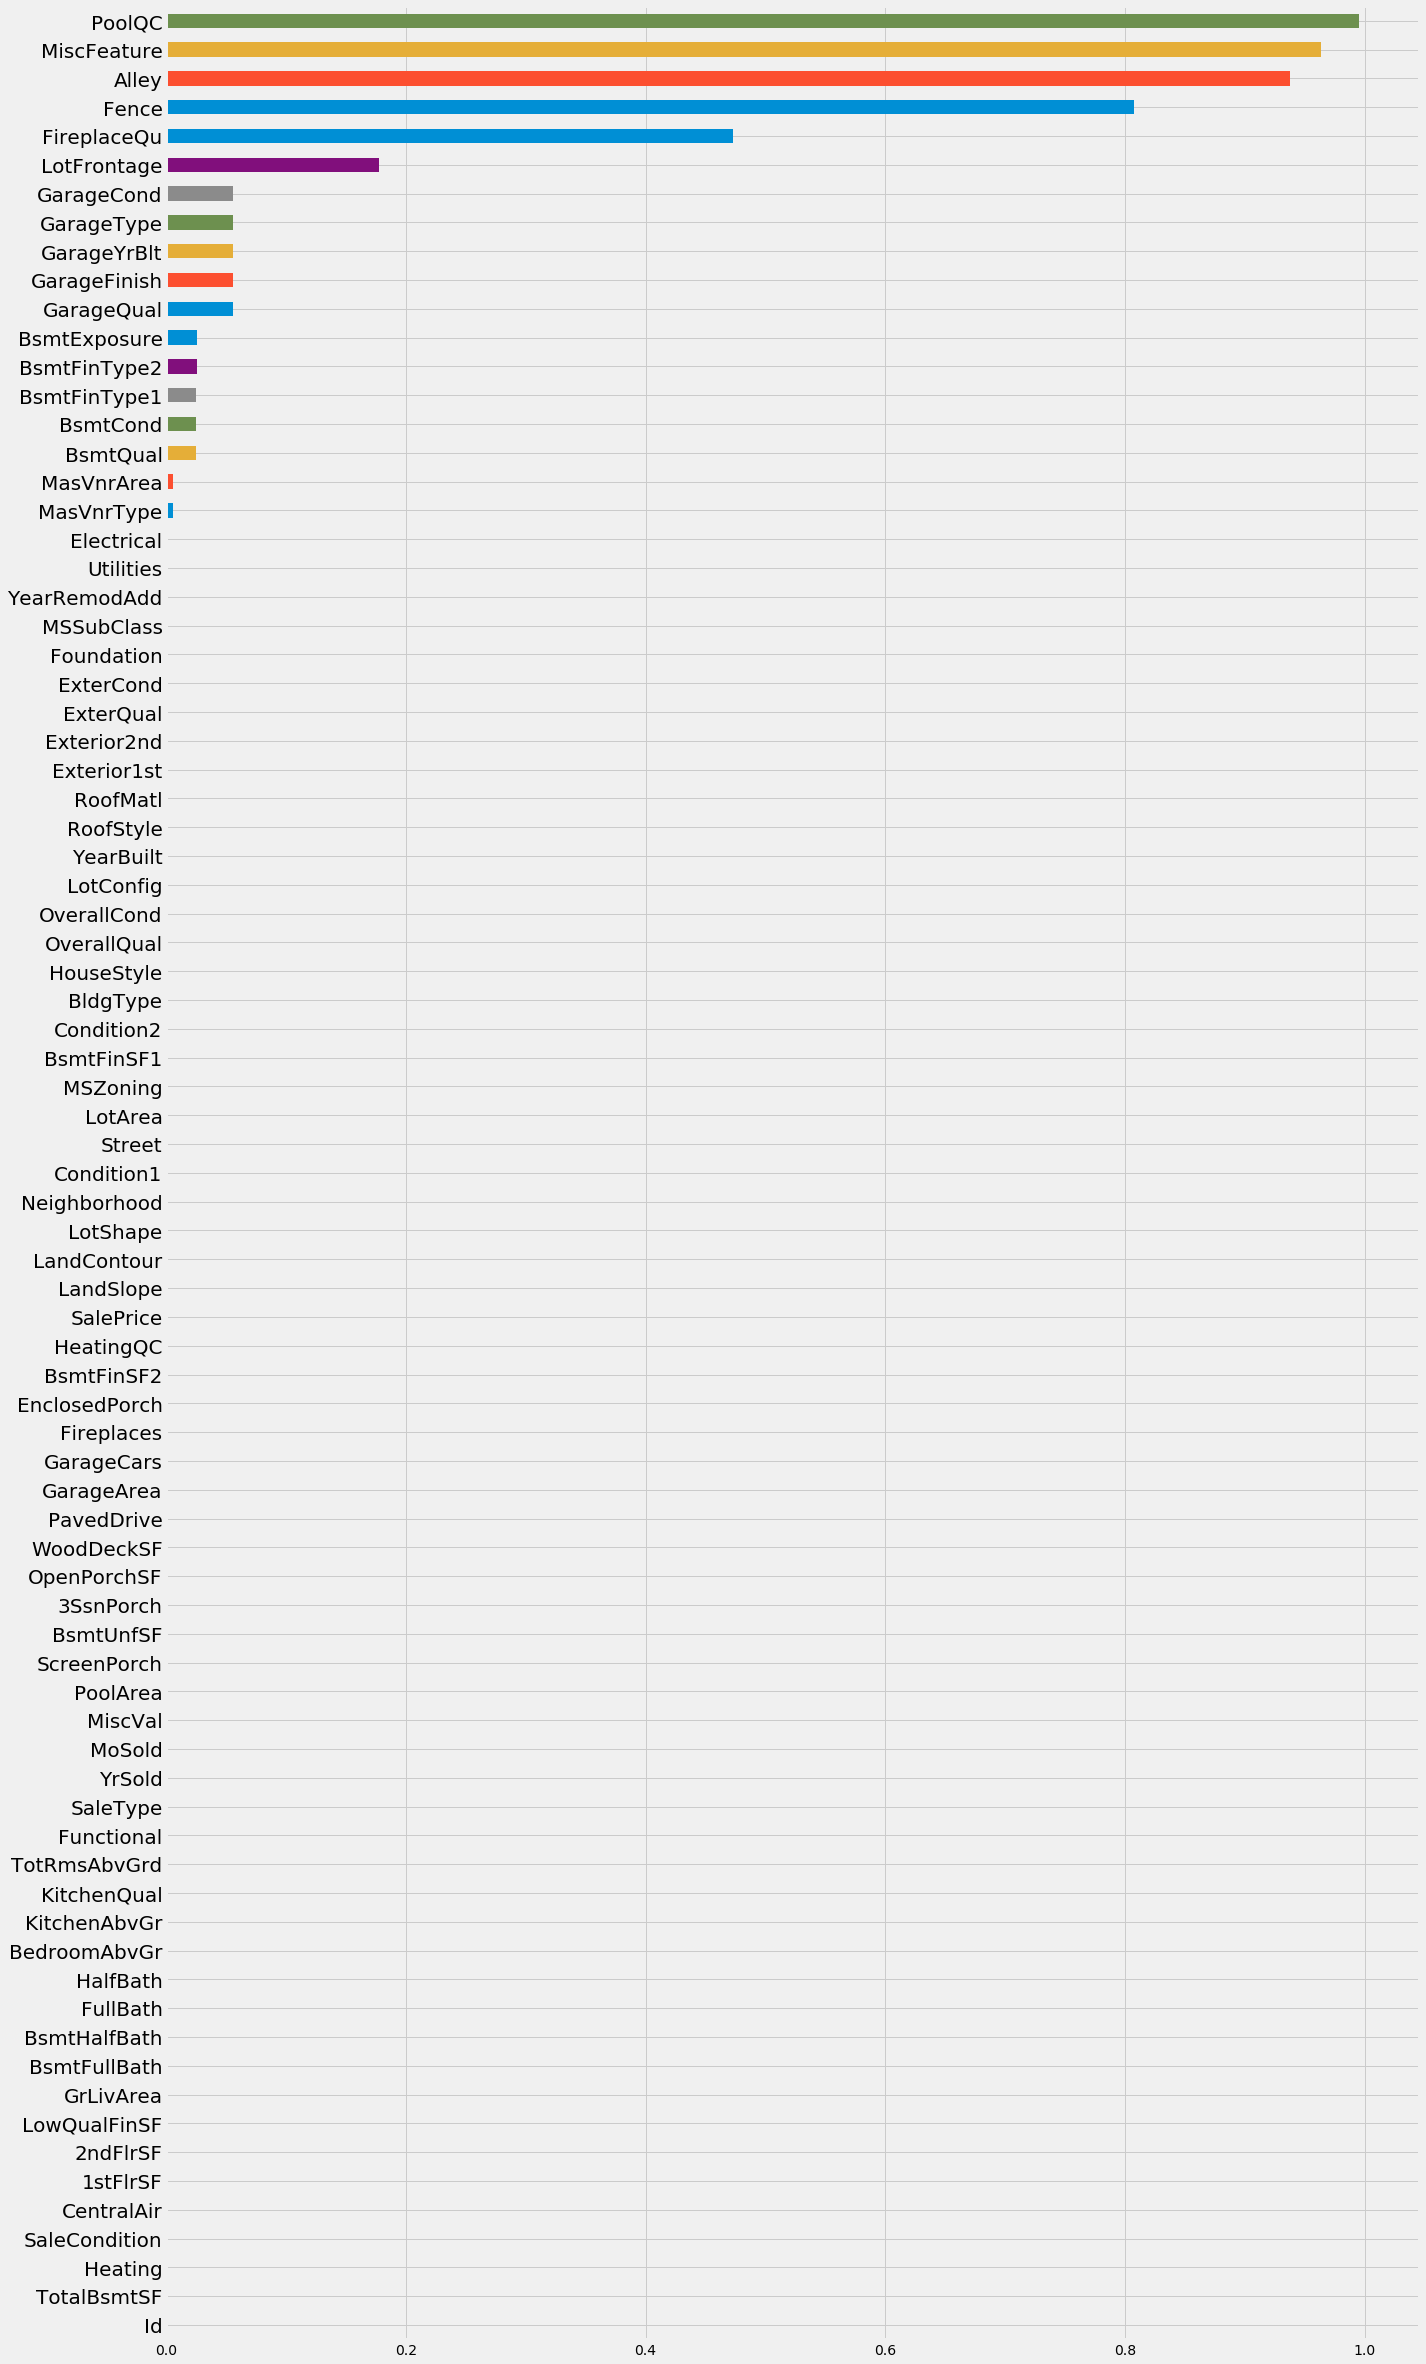

In [11]:
missing_percents = (len(data.index) - data.count())/len(data.index)
#missing_percents = missing_percents[missing_percents > 0]
missing_percents.sort_values(inplace=True)
#temp = pd.DataFrame(missing_percents, columns=['feature'])

missing_percents.plot.barh(figsize=(20,40))
plt.yticks(size=20)
plt.show()

In [12]:
drops = missing_percents[missing_percents > .75]
drops

Fence          0.807534
Alley          0.937671
MiscFeature    0.963014
PoolQC         0.995205
dtype: float64

## Inappropriate Values

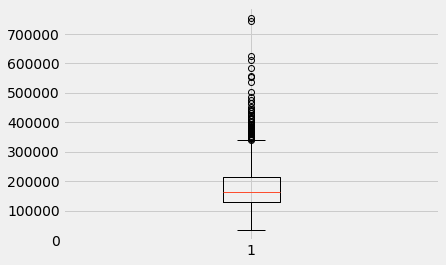

In [67]:
plt.close('all')
plt.boxplot(data['SalePrice'])
plt.show()

In [17]:
numeric = ['1stFlrSF','2ndFlrSF','3SsnPorch','BedroomAbvGr','BsmtFinSF1','BsmtFinSF2',
           'BsmtFullBath','BsmtHalfBath','BsmtUnfSF','EnclosedPorch','Fireplaces',
           'FullBath','GarageArea','GarageCars','GrLivArea','HalfBath','KitchenAbvGr',
           'LotArea','LotFrontage','LowQualFinSF','MasVnrArea','MiscVal','OpenPorchSF',
           'PoolArea','ScreenPorch','TotalBsmtSF','TotRmsAbvGrd','WoodDeckSF']

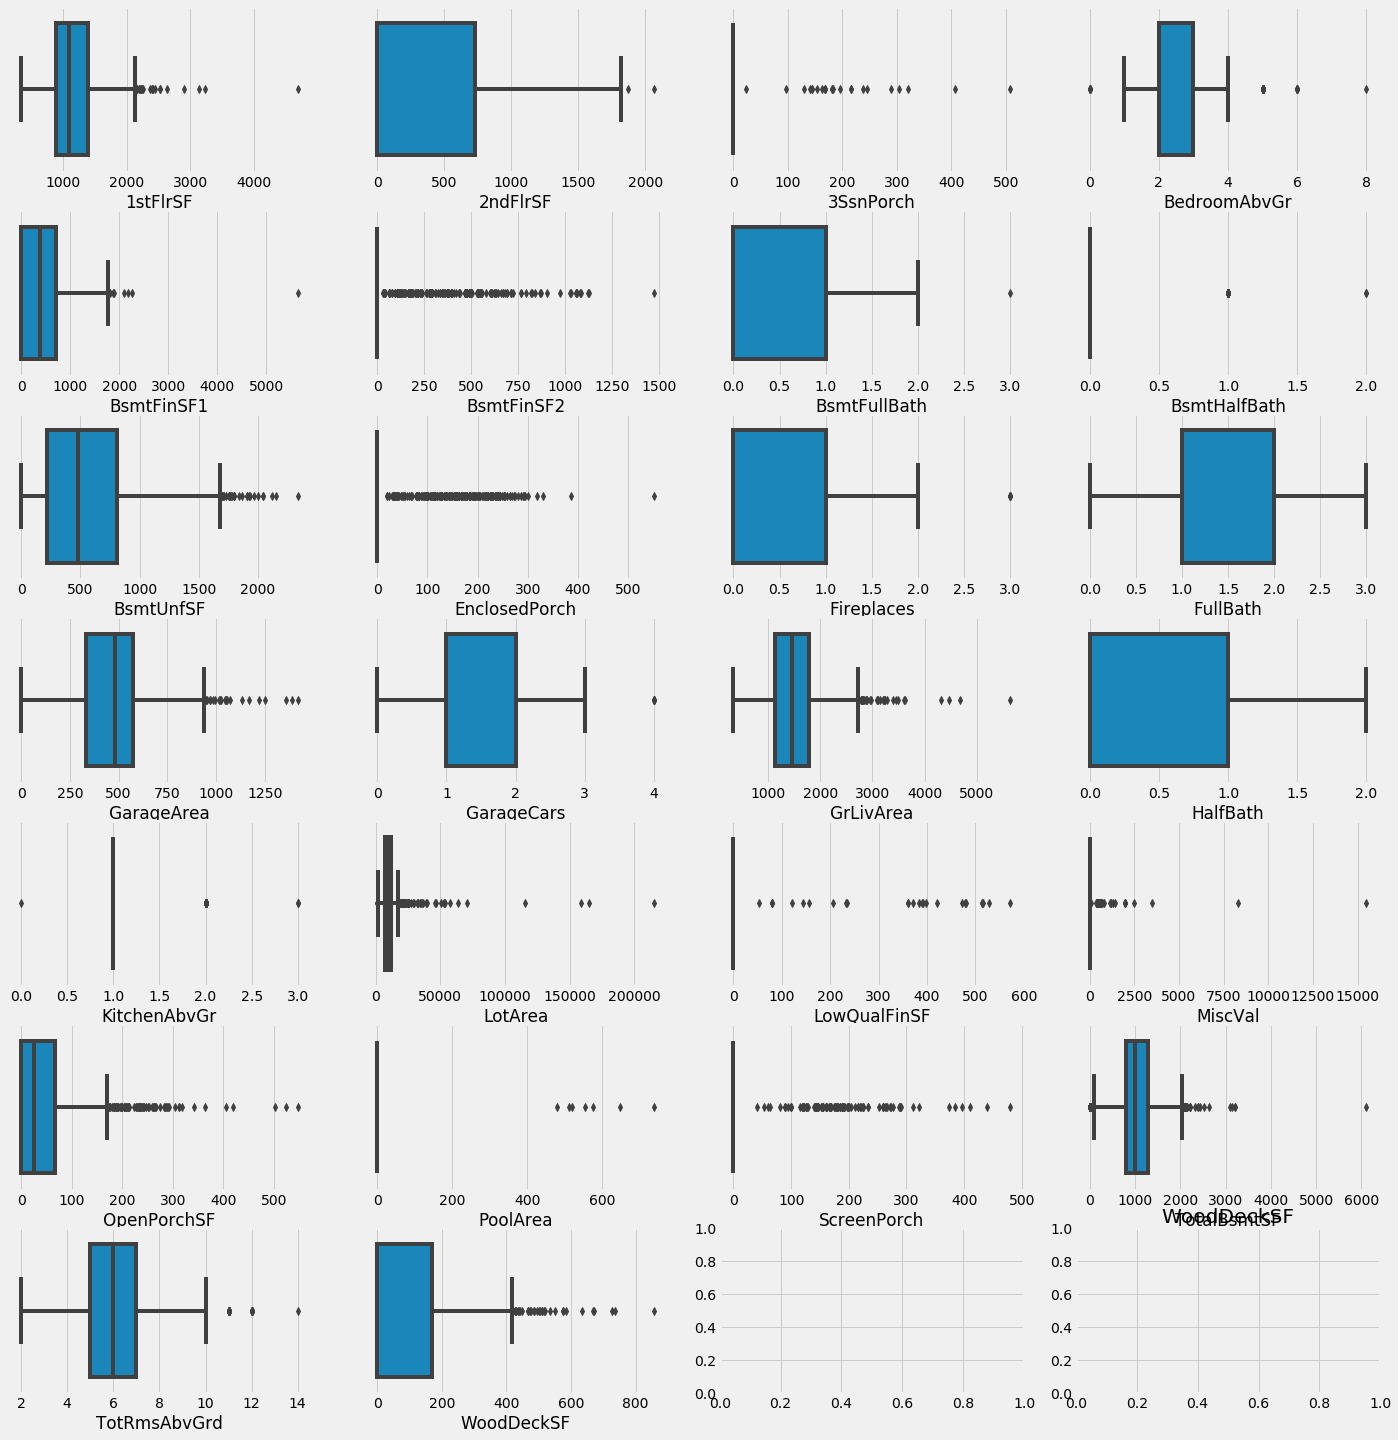

In [87]:
data_num = data[numeric]

floats=['LotFrontage','MasVnrArea']
data_float= data[floats]


data_num.drop('LotFrontage', axis=1, inplace=True)
data_num.drop('MasVnrArea', axis=1, inplace=True)


plt.close('all')
fig, axes = plt.subplots(7, 4, figsize=(20, 20))
columns = list(data_num)
plt.tight_layout()
for i, ax in enumerate(fig.axes):
    if i < len(list(data_num)):
        sns.boxplot(x=data_num.columns[i], data=data_num, ax=ax)
        plt.title(columns[i])
plt.show()     


In [95]:
outliers = data[data['LotArea']>100000]
outliers = outliers.append(data[data['1stFlrSF']>3000])
outliers = outliers.append(data[data['TotalBsmtSF']>5000])
outliers

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
249,50,RL,NaN,159000,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1.5Fin,6,7,1958,2006,Gable,CompShg,Wd Sdng,HdBoard,BrkCmn,472.0,Gd,TA,CBlock,Gd,TA,Gd,Rec,697,Unf,0,747,1444,GasA,Gd,Y,SBrkr,1444,700,0,2144,0,1,2,0,4,1,Gd,7,Typ,2,TA,Attchd,1958.0,Fin,2,389,TA,TA,Y,0,98,0,0,0,0,500,6,2007,WD,Normal,277000
313,20,RL,150.0,215245,Pave,IR3,Low,AllPub,Inside,Sev,Timber,Norm,Norm,1Fam,1Story,7,5,1965,1965,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,1236,Rec,820,80,2136,GasW,TA,Y,SBrkr,2036,0,0,2036,2,0,2,0,3,1,TA,8,Typ,2,Gd,Attchd,1965.0,RFn,2,513,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Normal,375000
335,190,RL,NaN,164660,Grvl,IR1,HLS,AllPub,Corner,Sev,Timber,Norm,Norm,2fmCon,1.5Fin,5,6,1965,1965,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Gd,ALQ,1249,BLQ,147,103,1499,GasA,Ex,Y,SBrkr,1619,167,0,1786,2,0,2,0,3,1,TA,7,Typ,2,Gd,Attchd,1965.0,Fin,2,529,TA,TA,Y,670,0,0,0,0,0,700,8,2008,WD,Normal,228950
706,20,RL,NaN,115149,Pave,IR2,Low,AllPub,CulDSac,Sev,ClearCr,Norm,Norm,1Fam,1Story,7,5,1971,2002,Gable,CompShg,Plywood,Plywood,Stone,351.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,1219,Unf,0,424,1643,GasA,TA,Y,SBrkr,1824,0,0,1824,1,0,2,0,2,1,Gd,5,Typ,2,TA,Attchd,1971.0,Unf,2,739,TA,TA,Y,380,48,0,0,0,0,0,6,2007,WD,Normal,302000
496,20,RL,NaN,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,1Story,8,5,1992,1993,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,1231,Unf,0,1969,3200,GasA,Ex,Y,SBrkr,3228,0,0,3228,1,0,3,0,4,1,Gd,10,Typ,1,Gd,Attchd,1992.0,RFn,2,546,TA,TA,Y,264,75,291,0,0,0,0,5,2007,WD,Normal,430000
523,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000
1298,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


## Cleansing

First drop columns that have 75% or more missing data, as well as the ID column

In [177]:
columns = drops.index
for c in columns:
    data.drop(c, axis=1, inplace=True)

data.drop('Id', axis=1, inplace=True)


Next identify the remaining columns with missing values

In [178]:
fills = missing_percents[missing_percents>0]
fills = fills[fills<.75]
fills

Electrical      0.000685
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtFinType2    0.026027
BsmtExposure    0.026027
GarageQual      0.055479
GarageFinish    0.055479
GarageYrBlt     0.055479
GarageType      0.055479
GarageCond      0.055479
LotFrontage     0.177397
FireplaceQu     0.472603
dtype: float64

In [179]:
modes = ['Electrical','MasVnrType','BsmtQual','BsmtCond','BsmtFinType1','BsmtFinType2',
         'BsmtExposure','GarageQual','GarageFinish','GarageYrBlt','GarageType',
         'GarageCond']
medians = ['MasVnrArea','LotFrontage']

for m in modes:
    values = data[m].mode()
    data[m].fillna(values[0], inplace=True)

for m in medians:
    data[m].fillna(data[m].median(), inplace=True)


In [180]:
data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

In [181]:
data.groupby('Fireplaces')['FireplaceQu'].value_counts()

Fireplaces  FireplaceQu
1           Gd             324
            TA             259
            Fa              28
            Po              20
            Ex              19
2           Gd              54
            TA              53
            Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
Name: FireplaceQu, dtype: int64

In [182]:
data.drop('FireplaceQu', axis=1, inplace=True)

## Feature Distributions

In [55]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

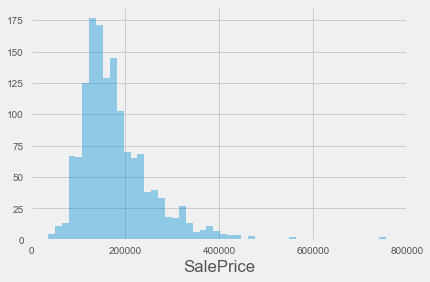

In [241]:
plt.close('all')
sns.distplot(data['SalePrice'],  kde = False)
plt.xticks(range(0, 900000, 200000))
plt.show()

In [187]:
data_num.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LowQualFinSF,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,TotRmsAbvGrd,WoodDeckSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,3.409589,2.866438,443.639726,46.549315,0.425342,0.057534,567.240411,21.954110,0.613014,1.565068,472.980137,1.767123,1515.463699,0.382877,1.046575,10516.828082,5.844521,43.489041,46.660274,2.758904,15.060959,1057.429452,6.517808,94.244521
std,386.587738,436.528436,29.317331,0.815778,456.098091,161.319273,0.518911,0.238753,441.866955,61.119149,0.644666,0.550916,213.804841,0.747315,525.480383,0.502885,0.220338,9981.264932,48.623081,496.123024,66.256028,40.177307,55.757415,438.705324,1.625393,125.338794
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,882.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,223.000000,0.000000,0.000000,1.000000,334.500000,1.000000,1129.500000,0.000000,1.000000,7553.500000,0.000000,0.000000,0.000000,0.000000,0.000000,795.750000,5.000000,0.000000
50%,1087.000000,0.000000,0.000000,3.000000,383.500000,0.000000,0.000000,0.000000,477.500000,0.000000,1.000000,2.000000,480.000000,2.000000,1464.000000,0.000000,1.000000,9478.500000,0.000000,0.000000,25.000000,0.000000,0.000000,991.500000,6.000000,0.000000
75%,1391.250000,728.000000,0.000000,3.000000,712.250000,0.000000,1.000000,0.000000,808.000000,0.000000,1.000000,2.000000,576.000000,2.000000,1776.750000,1.000000,1.000000,11601.500000,0.000000,0.000000,68.000000,0.000000,0.000000,1298.250000,7.000000,168.000000
max,4692.000000,2065.000000,508.000000,8.000000,5644.000000,1474.000000,3.000000,2.000000,2336.000000,552.000000,3.000000,3.000000,1418.000000,4.000000,5642.000000,2.000000,3.000000,215245.000000,572.000000,15500.000000,547.000000,738.000000,480.000000,6110.000000,14.000000,857.000000


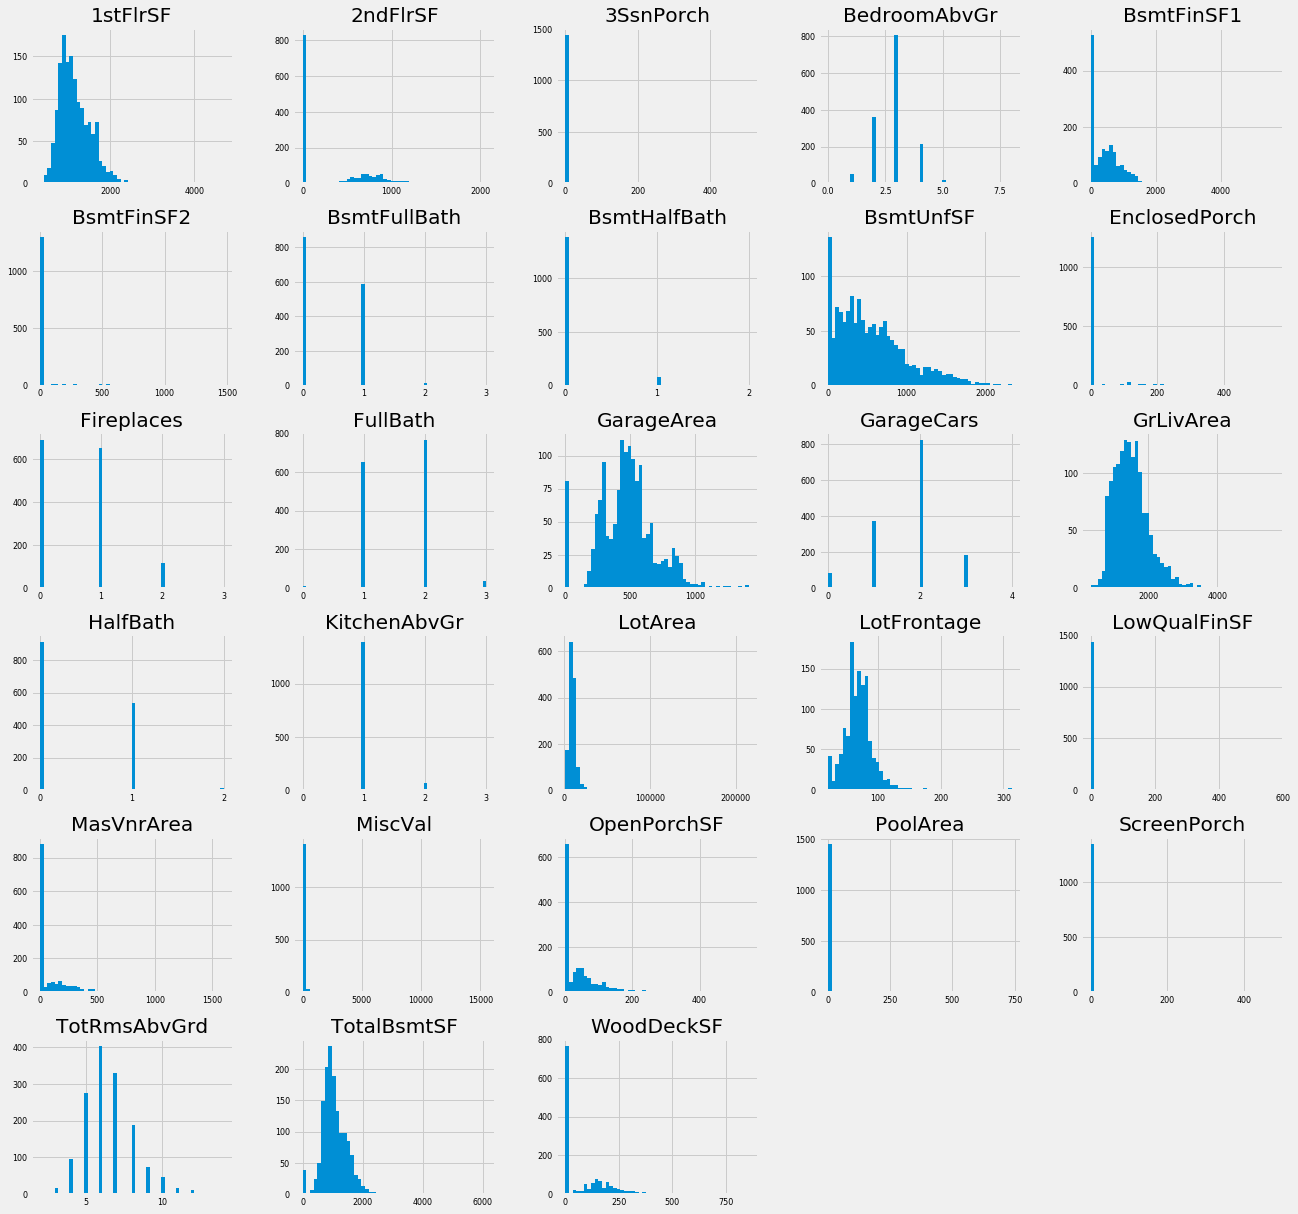

In [75]:
plt.close('all')
data_num.hist(figsize=(20, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

In [224]:
cat1 = ['BldgType','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
       'CentralAir','Condition1','Condition2','Electrical','ExterCond','Exterior1st',
       'Exterior2nd','ExterQual','Foundation','Functional','GarageCond','GarageFinish',
       'GarageQual','GarageType','GarageYrBlt','Heating','HeatingQC','HouseStyle']
cat2=['KitchenQual','LandContour','LandSlope','LotConfig','LotShape',
       'MasVnrType','MoSold','MSSubClass','MSZoning','Neighborhood',
       'OverallCond','OverallQual','PavedDrive','RoofMatl','RoofStyle',
       'SaleCondition','SaleType','Street','Utilities','YearBuilt','YearRemodAdd','YrSold']
    
data_cat1= data[cat1]
data_cat2 = data[cat2]

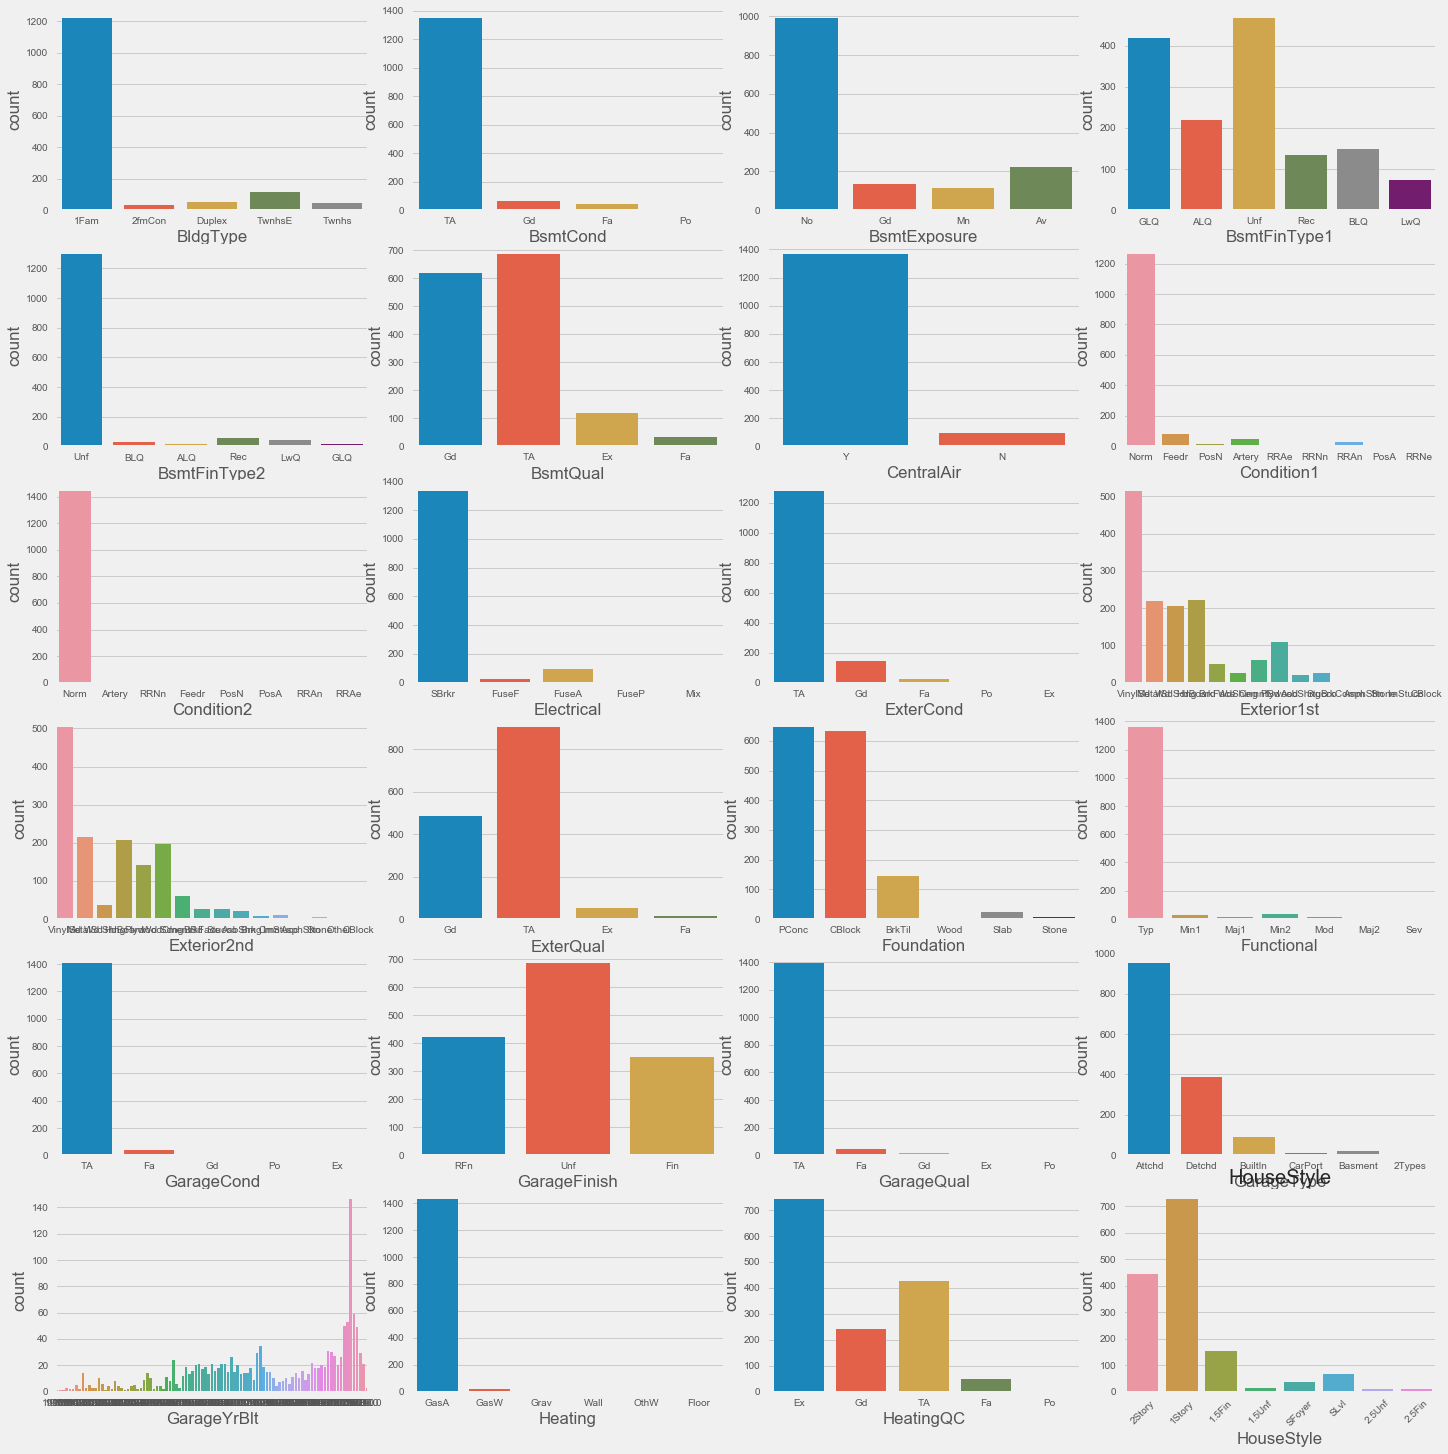

In [240]:
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.xticks(rotation=45) 
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat1):
        sns.countplot(x=data_cat1.columns[i], data=data_cat1, ax=ax)
        plt.title(cat1[i])

plt.show()      



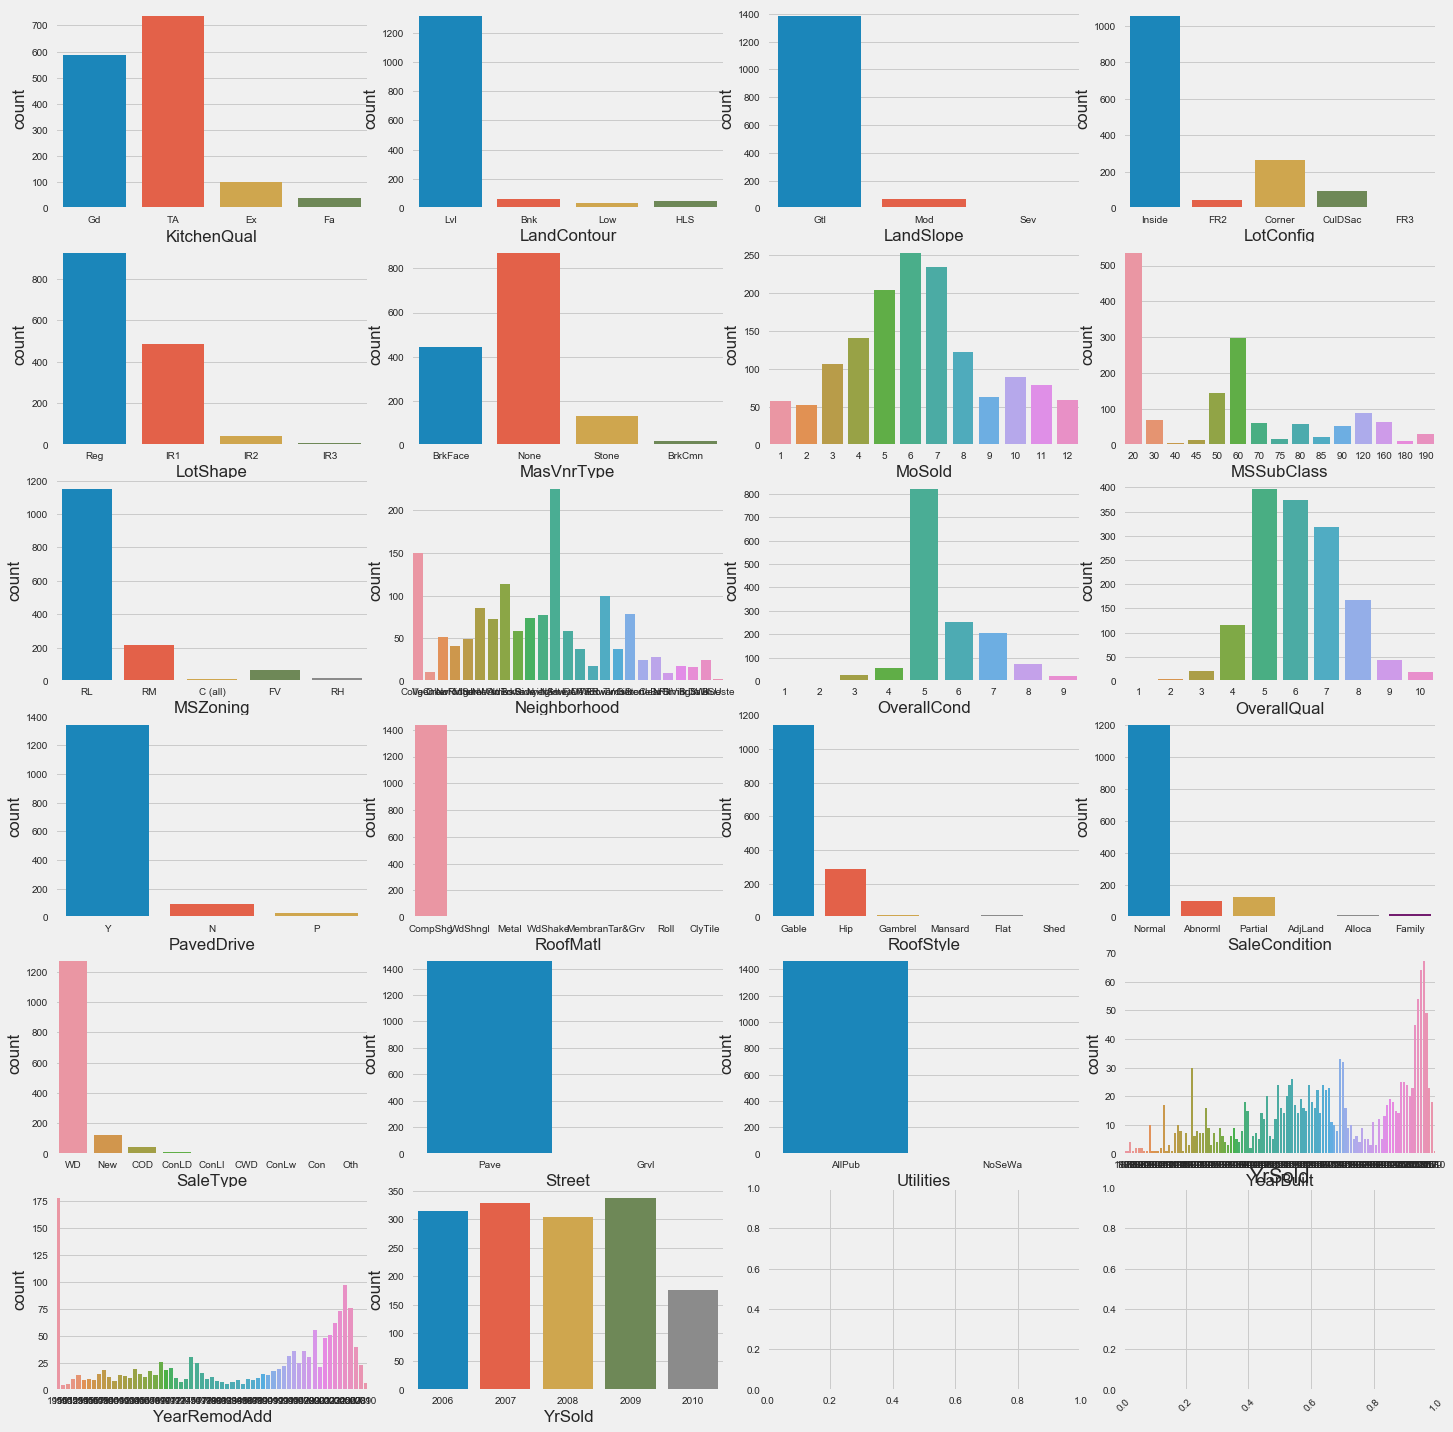

In [226]:
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.xticks(rotation=45) 
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat2):
        sns.countplot(x=data_cat2.columns[i], data=data_cat2, ax=ax)
        plt.title(cat2[i])

plt.show()      




In [227]:
data_cat1.describe()

,GarageYrBlt
count,1460.000000
mean,1979.976027
std,24.749688
min,1900.000000
25%,1962.000000
50%,1984.500000
75%,2003.000000
max,2010.000000


In [228]:
data_cat2.describe()

,MoSold,MSSubClass,OverallCond,OverallQual,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.321918,56.897260,5.575342,6.099315,1971.267808,1984.865753,2007.815753
std,2.703626,42.300571,1.112799,1.382997,30.202904,20.645407,1.328095
min,1.000000,20.000000,1.000000,1.000000,1872.000000,1950.000000,2006.000000
25%,5.000000,20.000000,5.000000,5.000000,1954.000000,1967.000000,2007.000000
50%,6.000000,50.000000,5.000000,6.000000,1973.000000,1994.000000,2008.000000
75%,8.000000,70.000000,6.000000,7.000000,2000.000000,2004.000000,2009.000000
max,12.000000,190.000000,9.000000,10.000000,2010.000000,2010.000000,2010.000000


## Correlations

In [192]:
numeric.append('SalePrice')

correlations = data[numeric]

In [193]:
correlations.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MasVnrArea,MiscVal,OpenPorchSF,PoolArea,ScreenPorch,TotalBsmtSF,TotRmsAbvGrd,WoodDeckSF,SalePrice
0,856,854,0,3,706,0,1,0,150,0,0,2,548,2,1710,1,1,8450,65.0,0,196.0,0,61,0,0,856,8,0,208500
1,1262,0,0,3,978,0,0,1,284,0,1,2,460,2,1262,0,1,9600,80.0,0,0.0,0,0,0,0,1262,6,298,181500
2,920,866,0,3,486,0,1,0,434,0,1,2,608,2,1786,1,1,11250,68.0,0,162.0,0,42,0,0,920,6,0,223500
3,961,756,0,3,216,0,1,0,540,272,1,1,642,3,1717,0,1,9550,60.0,0,0.0,0,35,0,0,756,7,0,140000
4,1145,1053,0,4,655,0,1,0,490,0,1,2,836,3,2198,1,1,14260,84.0,0,350.0,0,84,0,0,1145,9,192,250000


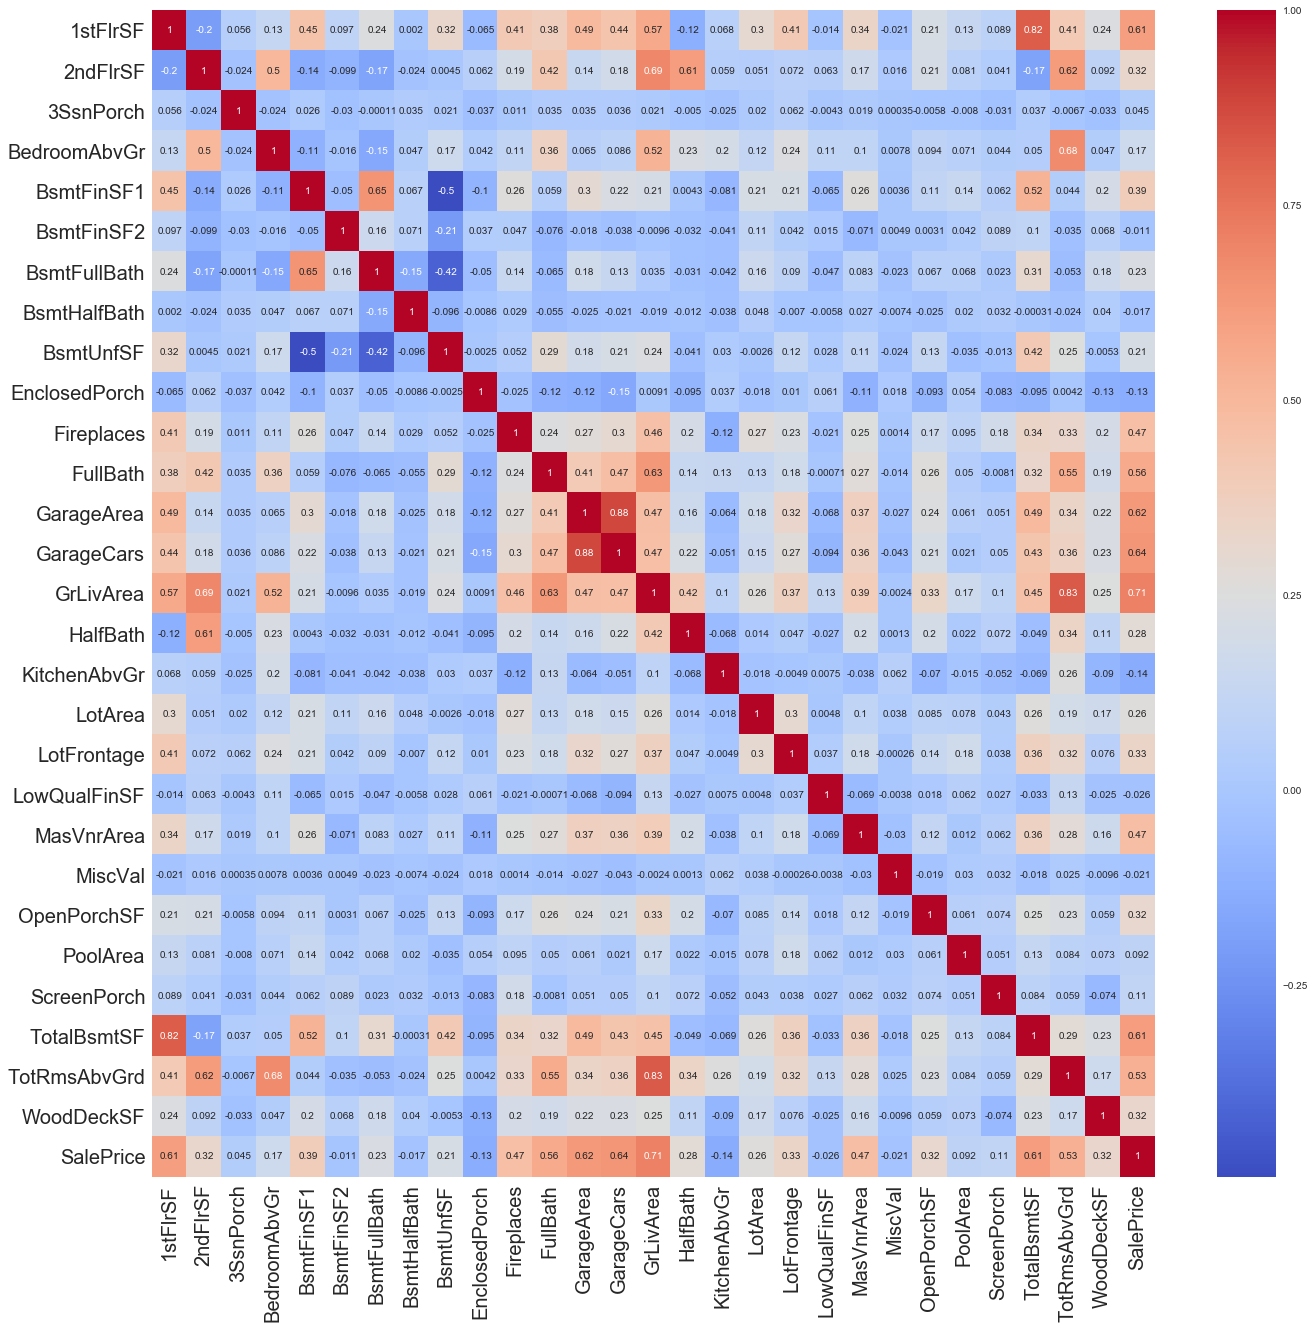

In [205]:
plt.close('all')

plt.figure(figsize=(20,20))
plt.tick_params(labelsize=20)
sns.heatmap(correlations.corr(), annot=True, annot_kws={"size": 10}, cmap=cm.coolwarm)

plt.show()

In [216]:
c = correlations.corr()
cc = c[abs(c['SalePrice']) >= .25]
cc['SalePrice']

1stFlrSF        0.605852
2ndFlrSF        0.319334
BsmtFinSF1      0.386420
Fireplaces      0.466929
FullBath        0.560664
GarageArea      0.623431
GarageCars      0.640409
GrLivArea       0.708624
HalfBath        0.284108
LotArea         0.263843
LotFrontage     0.334771
MasVnrArea      0.472614
OpenPorchSF     0.315856
TotalBsmtSF     0.613581
TotRmsAbvGrd    0.533723
WoodDeckSF      0.324413
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [208]:
data['Pool'] = data['PoolArea'].map(lambda a: 1 if a > 0 else 0)

In [210]:
data.groupby('Pool')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
Pool,,,,,,,,
0,1453.0,180404.663455,78168.872519,34900.0,129900.0,162900.0,213500.0,755000.0
1,7.0,288138.571429,206071.850935,160000.0,176000.0,235000.0,262485.0,745000.0


In [217]:
data['FireCnt'] = data['Fireplaces'].map(lambda a: 1 if a > 0 else 0)
data.groupby('FireCnt')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
FireCnt,,,,,,,,
0,690.0,141331.482609,44389.786884,34900.0,112000.0,135000.0,164375.0,342643.0
1,770.0,216397.692208,86843.901262,60000.0,159000.0,191000.0,257375.0,755000.0


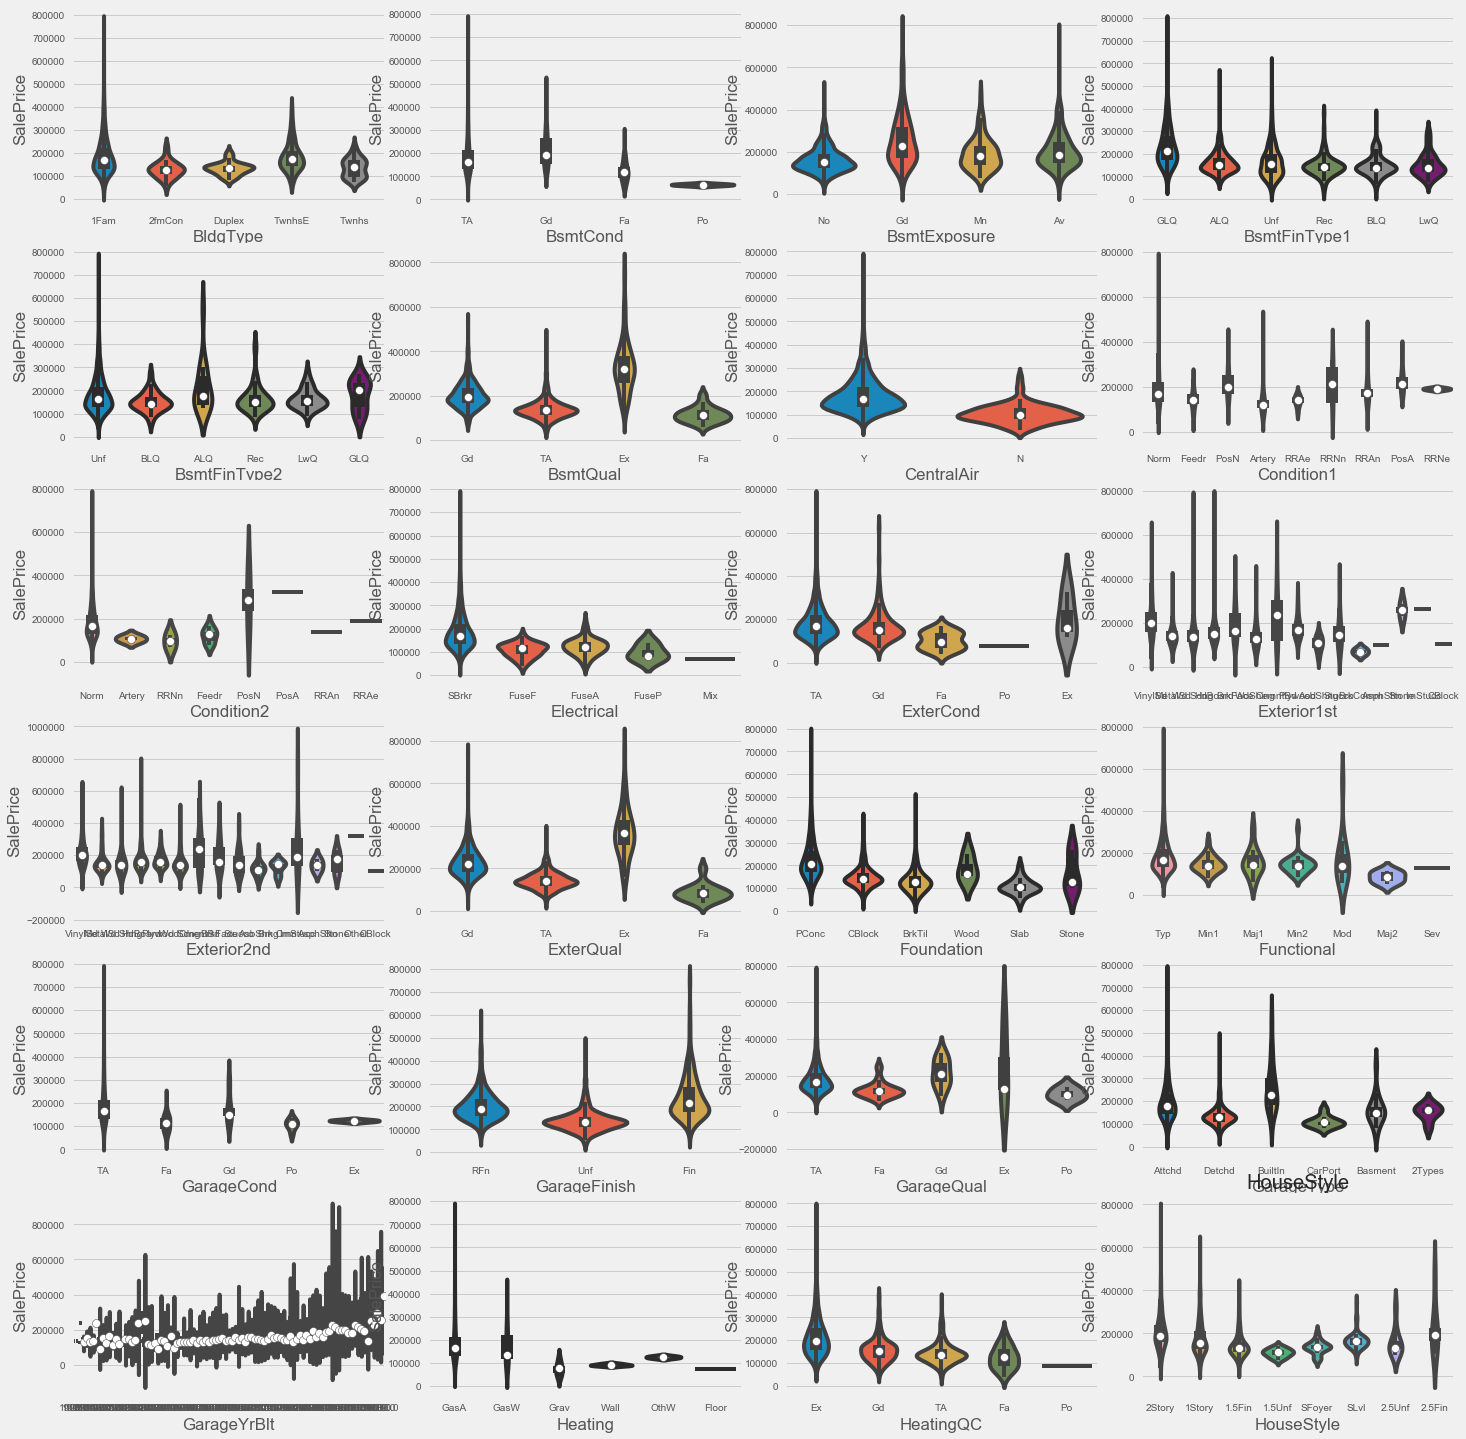

In [238]:
#cat1.append('SalePrice')
#data_cat1 = data[cat1]
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat1):
        sns.violinplot(x=data_cat1.columns[i], y='SalePrice', data=data_cat1, ax=ax);
        plt.title(cat1[i])

plt.show()      



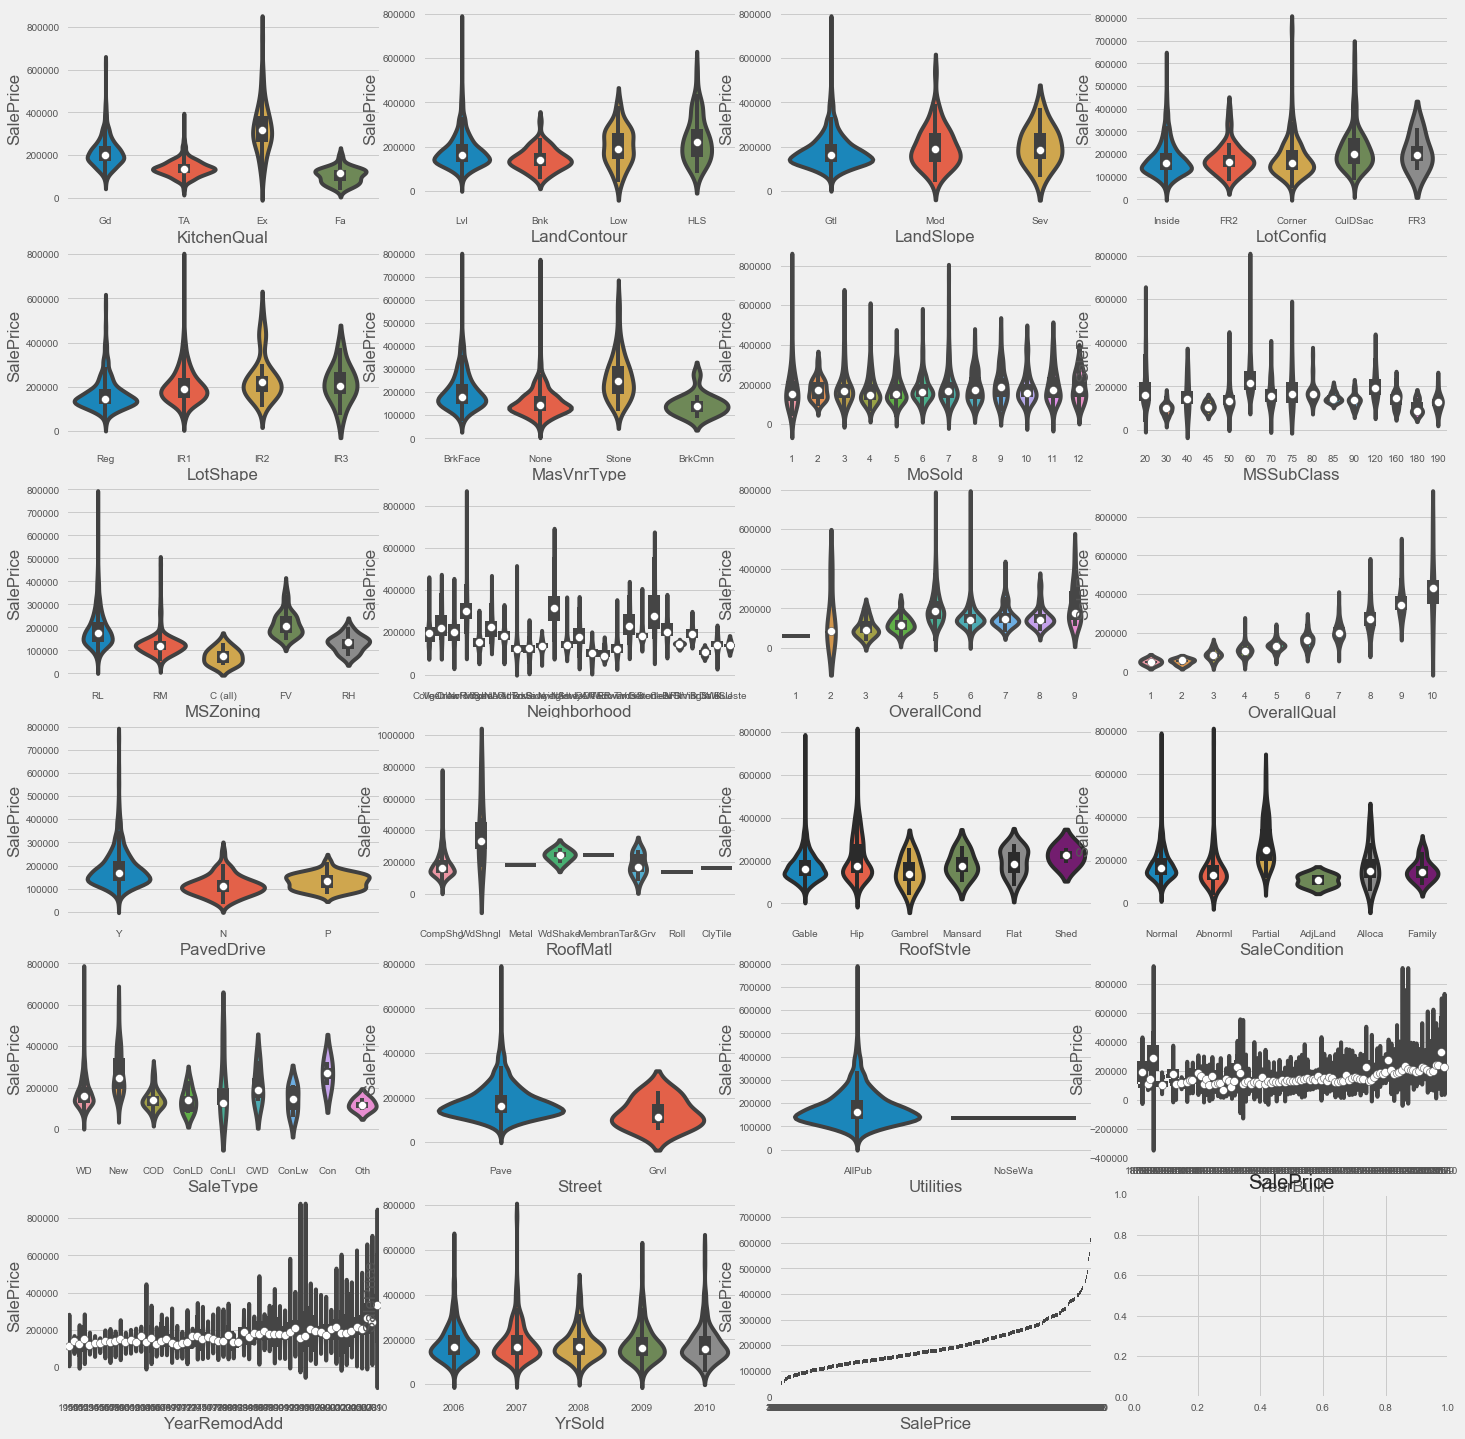

In [239]:
#cat2.append('SalePrice')
#data_cat2 = data[cat2]
plt.close('all')
fig, axes = plt.subplots(6, 4, figsize=(20, 20))
plt.tight_layout()

# https://stackoverflow.com/questions/20288842/matplotlib-iterate-subplot-axis-array-through-single-list    
for i, ax in enumerate(fig.axes):
    if i < len(cat2):
        sns.violinplot(x=data_cat2.columns[i], y='SalePrice', data=data_cat2, ax=ax);
        plt.title(cat2[i])

plt.show()      



In [ ]:
## Categorical Variance

In [ ]:
## Exploratory Data Analysis Summary

In [ ]:
# Part B